In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings(action='ignore')

In [121]:
train = pd.read_csv('train.csv', engine='python')
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [122]:
test = pd.read_csv('test.csv', engine='python')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k: 2, inertia : 141731596052.6865
k: 3, inertia : 93263968980.8303
k: 4, inertia : 67366933376.6103
k: 5, inertia : 56826783262.8566
k: 6, inertia : 47063655777.2855
k: 7, inertia : 40093754913.9141
k: 8, inertia : 32174312396.5531
k: 9, inertia : 28008060710.1391
k: 10, inertia : 24741322974.3511


Text(0, 0.5, 'inertia')

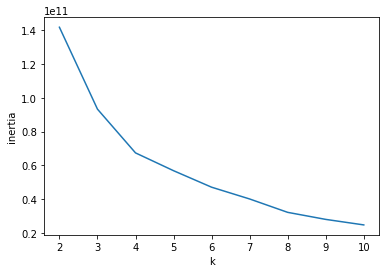

In [123]:
#적정 군집수 파악
cl_train = train['전력사용량(kWh)'].values.reshape(60, -1)
inertia_arr = []
k_arr = range(2, 11)

for k in k_arr:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cl_train)
    interia = kmeans.inertia_
    
    print('k: {0}, inertia : {1:.4f}'.format(k, interia))
    inertia_arr.append(interia)

plt.plot(k_arr, inertia_arr)
plt.xlabel('k')
plt.ylabel('inertia')

In [124]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(cl_train)
km_pred = km.predict(cl_train)

In [125]:
clusters = pd.DataFrame(km_pred)
clusters['num'] = train['num'].unique()
clusters

,0,num
0,2,1
1,0,2
2,3,3
3,0,4
4,3,5
5,0,6
6,0,7
7,1,8
8,0,9
9,0,10


In [126]:
train = train.merge(clusters, on='num')
train = train.rename(columns={0:'ass'})
test = test.merge(clusters, on='num')
test = test.rename(columns={0:'ass'})

In [127]:
# ice = pd.DataFrame(train['비전기냉방설비운영'])
# ice['num'] = train['num']
# ice =ice.drop_duplicates()

# hot = pd.DataFrame(train['태양광보유'])
# hot['num'] = train['num']
# hot = hot.drop_duplicates()

In [128]:
test.interpolate(method='values', inplace=True)
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,ass
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,NaN,NaN,2
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,NaN,NaN,2
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,NaN,NaN,2
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,NaN,NaN,2
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,3
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,3
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,3
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,3


In [129]:
train[['num', '비전기냉방설비운영','태양광보유']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'비전기냉방설비운영']
    hot[count]=train.loc[i,'태양광보유']
    
for i in range(len(test)):
    test.loc[i, '비전기냉방설비운영']=ice[test['num'][i]]
    test.loc[i, '태양광보유']=hot[test['num'][i]]

<AxesSubplot:xlabel='전력사용량(kWh)', ylabel='Density'>

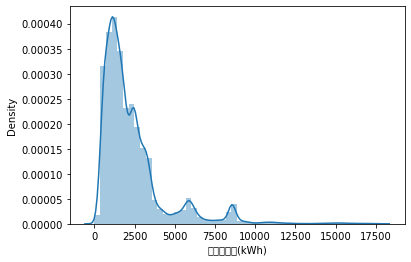

In [130]:
sns.distplot(train['전력사용량(kWh)'])

In [131]:
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

In [132]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['month'] = train['date_time'].dt.month
train['weekday'] = train['date_time'].dt.weekday
test['date_time'] = pd.to_datetime(test['date_time'])
test['month'] = test['date_time'].dt.month
test['weekday'] = test['date_time'].dt.weekday

In [133]:
def holiday(x):
    if str(x.date()) == '2020-06-06':
        return 1
    elif str(x.date()) == '2020-08-15':
        return 1
    elif x.weekday() == 5 or x.weekday() == 6:
        return 1
    else: 
        return 0

train['holiday'] = train['date_time'].apply(lambda x: holiday(x))
test['holiday'] = test['date_time'].apply(lambda x: holiday(x))

In [134]:
train2 = train.drop(['date_time', '전력사용량(kWh)'], axis=1)
test2 = test.drop(['date_time'], axis=1)

In [135]:
test2 = test2.rename(columns={'강수량(mm, 6시간)':'강수량(mm)'})
test2 = test2.rename(columns={'일조(hr, 3시간)':'일조(hr)'})

In [147]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(train2)
train2_scaled = pd.DataFrame(scaler.transform(train2), columns=train2.columns)
test2_scaled = pd.DataFrame(scaler.transform(test2), columns=test2.columns)

In [148]:
train2_scaled

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,ass,time,month,weekday,holiday
0,-1.0,-1.404255,0.333333,0.347826,0.8,0.000000,-1.0,0.0,0.666667,-1.000000,-0.5,-0.75,0.0
1,-1.0,-1.382979,0.555556,0.304348,0.3,0.000000,-1.0,0.0,0.666667,-0.913043,-0.5,-0.75,0.0
2,-1.0,-1.425532,0.722222,0.304348,0.0,0.000000,-1.0,0.0,0.666667,-0.826087,-0.5,-0.75,0.0
3,-1.0,-1.510638,0.722222,0.304348,0.0,0.000000,-1.0,0.0,0.666667,-0.739130,-0.5,-0.75,0.0
4,-1.0,-1.531915,0.777778,0.347826,0.0,0.000000,-1.0,0.0,0.666667,-0.652174,-0.5,-0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,1.0,0.765957,0.222222,-0.695652,0.0,2.333333,0.0,1.0,1.000000,0.652174,0.5,-0.75,0.0
122396,1.0,0.659574,-0.388889,-0.565217,0.0,0.000000,0.0,1.0,1.000000,0.739130,0.5,-0.75,0.0
122397,1.0,0.659574,-0.055556,-0.565217,0.0,0.000000,0.0,1.0,1.000000,0.826087,0.5,-0.75,0.0
122398,1.0,0.617021,-0.055556,-0.434783,0.0,0.000000,0.0,1.0,1.000000,0.913043,0.5,-0.75,0.0


In [76]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1, n_estimators=10000, colsample_bytree=0.5, subsample=0.7, n_jobs=-1)

In [142]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0
result2 = 0
best_score = 0
for train_idx, test_idx in kf.split(train2, train['전력사용량(kWh)']):
    x_train, x_val = train2.iloc[train_idx], train2.iloc[test_idx]
    y_train, y_val = train['전력사용량(kWh)'][train_idx], train['전력사용량(kWh)'][test_idx]
    xgb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], verbose=50, early_stopping_rounds=100)
    best_socre = xgb.best_score/5
    result2 += li.predict(test2)/5
    i += 1
    print(f'----------------------------------------n_fold:{i}----------------------------------------')

[0]	validation_0-rmse:inf	validation_1-rmse:inf
[50]	validation_0-rmse:inf	validation_1-rmse:inf


ValueError: could not convert string to float: '-nan(ind)'

In [114]:
from lightgbm import LGBMRegressor
li = LGBMRegressor(n_estimators=10000, random_state=42)

In [154]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0
result2 = 0
best_score = 0
for train_idx, test_idx in kf.split(train2, train['전력사용량(kWh)']):
    x_train, x_val = train2_scaled.iloc[train_idx], train2_scaled.iloc[test_idx]
    y_train, y_val = train['전력사용량(kWh)'][train_idx], train['전력사용량(kWh)'][test_idx]
    li.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)], verbose=50, early_stopping_rounds=300)
    result2 += li.predict(test2_scaled)/5
    i += 1
    print(f'----------------------------------------n_fold:{i}----------------------------------------')

training's l2: 5880.15	valid_1's l2: 35199.7
[7550]	training's l2: 5838.65	valid_1's l2: 35172.2
[7600]	training's l2: 5793.62	valid_1's l2: 35159.6
[7650]	training's l2: 5755.46	valid_1's l2: 35161.5
[7700]	training's l2: 5719.25	valid_1's l2: 35152.3
[7750]	training's l2: 5674.55	valid_1's l2: 35141.4
[7800]	training's l2: 5628.48	valid_1's l2: 35117.5
[7850]	training's l2: 5586.18	valid_1's l2: 35111
[7900]	training's l2: 5546	valid_1's l2: 35101.1
[7950]	training's l2: 5503.44	valid_1's l2: 35093.1
[8000]	training's l2: 5465.94	valid_1's l2: 35087.8
[8050]	training's l2: 5423.07	valid_1's l2: 35075.2
[8100]	training's l2: 5378.64	valid_1's l2: 35054.8
[8150]	training's l2: 5342.11	valid_1's l2: 35049.5
[8200]	training's l2: 5305.32	valid_1's l2: 35038.4
[8250]	training's l2: 5274.29	valid_1's l2: 35043
[8300]	training's l2: 5240.29	valid_1's l2: 35018.5
[8350]	training's l2: 5216.91	valid_1's l2: 35018.2
[8400]	training's l2: 5182.64	valid_1's l2: 35021.2
[8450]	training's l2: 5141

In [46]:
def mape(inp1, inp2):
    result = 0
    for i in range(len(inp1)):
        result += abs((inp1[i] - inp2[i]) / inp1[i])
    result = result * 100 / len(inp1)
    return result

In [156]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(li, train2, train['전력사용량(kWh)'], n_jobs=-1, cv=5, scoring='neg_mean_absolute_percentage_error')

In [78]:
print('lgbm :',np.sqrt(-cvs.mean())) #이전 lgbm 결과 - 18884626.05120877

lgbm : 17214432.31899231


In [80]:
print('xgb :',np.sqrt(-cvs.mean()))

xgb : 19475207.543885965


In [157]:
print('lgbm :',np.sqrt(-cvs.mean())) #이전 lgbm 결과 - 17214432.31899231

lgbm : 17214432.31899231


In [158]:
result2

array([8518.13443693, 8477.47652747, 8428.01888962, ..., 3617.35203823,
       3478.86224953, 3245.27392121])

In [159]:
sub = pd.read_csv('sample_submission.csv')
sub

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [160]:
sub['answer'] = result2
sub

,num_date_time,answer
0,1 2020-08-25 00,8518.134437
1,1 2020-08-25 01,8477.476527
2,1 2020-08-25 02,8428.018890
3,1 2020-08-25 03,8443.802833
4,1 2020-08-25 04,8518.426027
...,...,...
10075,60 2020-08-31 19,3890.172691
10076,60 2020-08-31 20,3771.012369
10077,60 2020-08-31 21,3617.352038
10078,60 2020-08-31 22,3478.862250


In [161]:
sub.to_csv('lgbm3_sub.csv', index=False)

<AxesSubplot:>

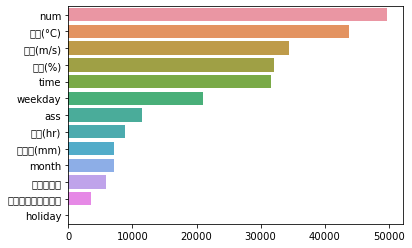

In [162]:
importance=pd.Series(li.feature_importances_, index=train2.columns).sort_values(ascending=False)
sns.barplot(importance, importance.index)